In this notebook, XGBoost classifier used on a human DNA sequence dataset to predict the gene family class label. The dataset contains seven different classes shown in the table below.

| gene family                   | number | class label |
| ----------------------------- | ------ | ----------- |
| *G-protein coupled receptors* | 531    | 0           |
| *Tyrosine kynase*             | 534    | 1           |
| *Tyrosine phosphatase*        | 349    | 2           |
| *Synthetase*                  | 672    | 3           |
| *Synthase*                    | 711    | 4           |
| *Ion channel*                 | 240    | 5           |
| *Transcription factor*        | 1343   | 6           |

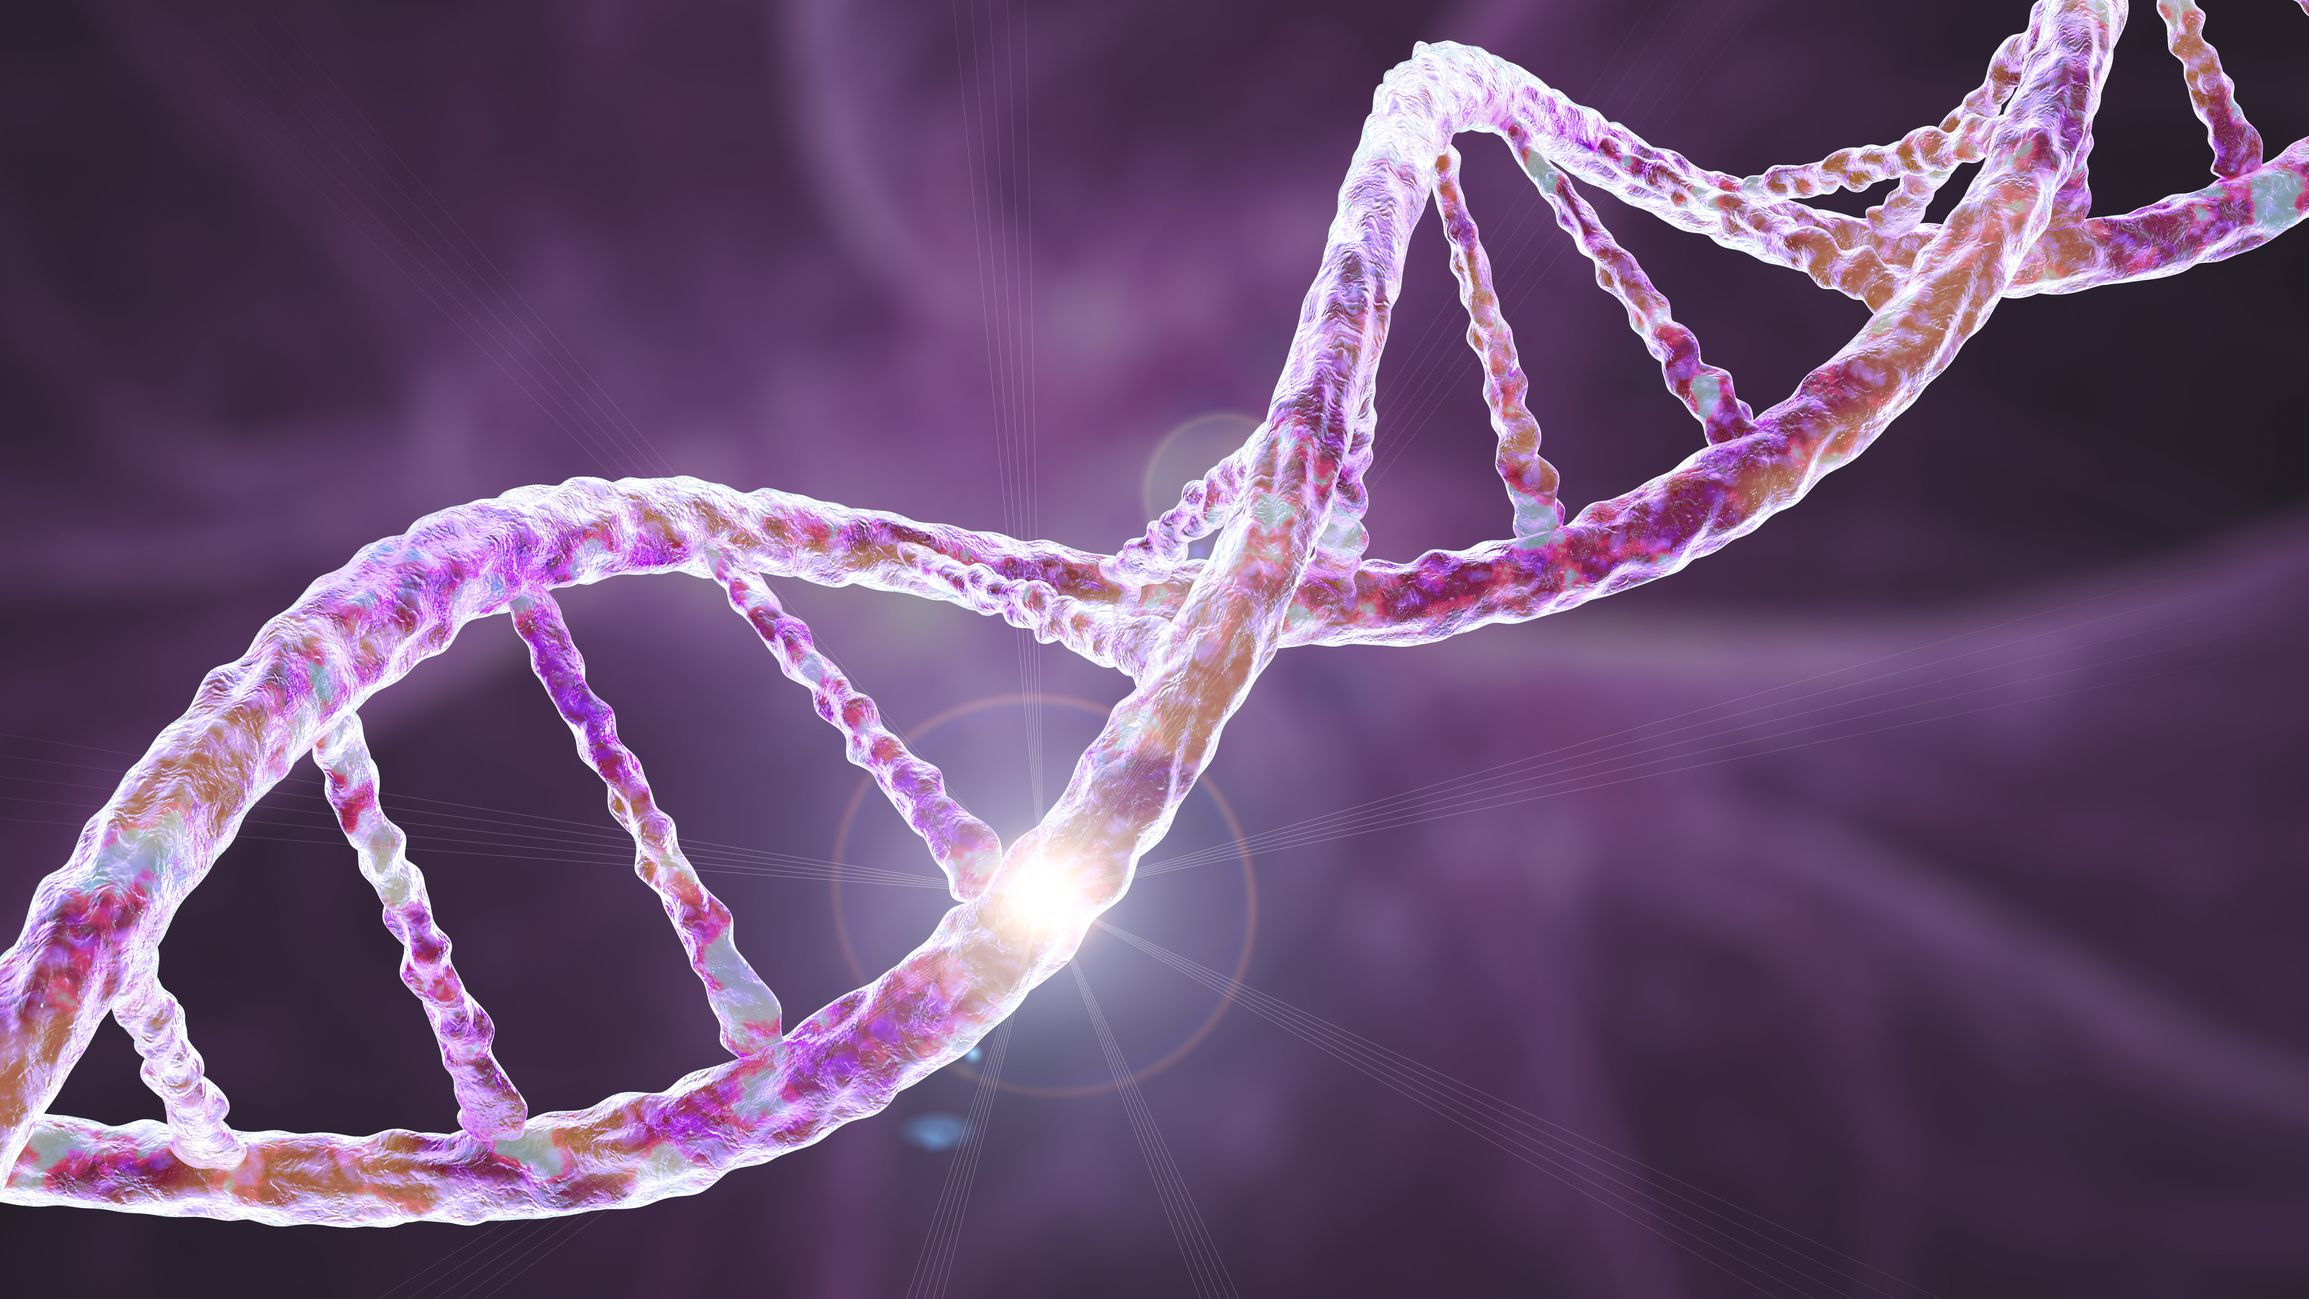

# Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Load the Data

In [3]:
human_data = pd.read_csv('/kaggle/input/humandnadata/human_data/human_data.txt', sep ='\t')

In [4]:
human_data

sequence  class
0     ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...      4
1     ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...      4
2     ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...      3
3     ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...      3
4     ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...      3
...                                                 ...    ...
4375  ATGGAAGATTTGGAGGAAACATTATTTGAAGAATTTGAAAACTATT...      0
4376  ATGCAGTCCTTTCGGGAGCAAAGCAGTTACCACGGAAACCAGCAAA...      6
4377  ATGCAGTCCTTTCGGGAGCAAAGCAGTTACCACGGAAACCAGCAAA...      6
4378  ATGGGGCACCTGGTTTGCTGTCTGTGTGGCAAGTGGGCCAGTTACC...      6
4379  ATGCAGTCCTTTCGGGAGCAAAGCAGTTACCACGGAAACCAGCAAA...      6

[4380 rows x 2 columns]

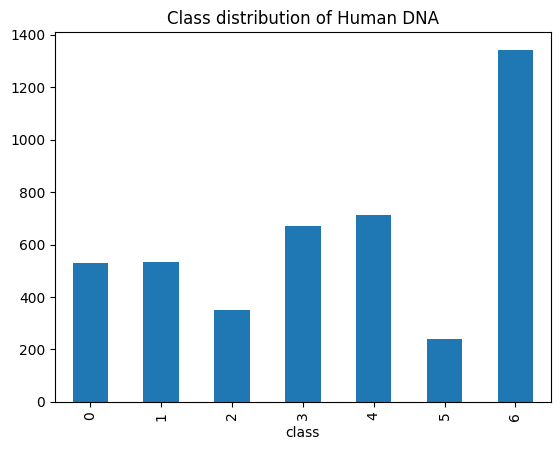

In [24]:
human_data['class'].value_counts().sort_index().plot.bar()
plt.title("Class distribution of Human DNA");

Since biological sequences are long I break them down into k-mer length overlapping sub-sequences.

In [6]:
# function will convert sequence into overlapping k-mer words for a specified length.
def kmers_funct(seq, size=6):
    return [seq[x:x+size].lower() for x in range(len(seq) - size + 1)]

In [7]:
kmers_funct('GTGCCCAGGT')

['gtgccc', 'tgccca', 'gcccag', 'cccagg', 'ccaggt']

In [8]:
human_data['words'] = human_data.apply(lambda x: kmers_funct(x['sequence']), axis=1)

In [9]:
human_data = human_data.drop('sequence', axis=1)
human_data.head()

class                                              words
0      4  [atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac...
1      4  [atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa...
2      3  [atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca...
3      3  [atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca...
4      3  [atgcaa, tgcaac, gcaaca, caacag, aacagc, acagc...

In [25]:
human_texts = list(human_data['words'])
for item in range(len(human_texts)):
    human_texts[item] = ' '.join(human_texts[item])
#separate labels
y_human = human_data.iloc[:, 0].values

In [26]:
print("length of human text seq.:", len(human_texts))
print("length of labels", y_human.shape)

length of human text seq.: 4380
length of labels (4380,)


In [12]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(ngram_range=(4,4)) 
X = cv.fit_transform(human_texts)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y_human, 
                                                    test_size = 0.1, 
                                                    random_state=1)

In [15]:
from xgboost import XGBClassifier

In [16]:
classifier = XGBClassifier(random_state = 1)
classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [21]:
from sklearn.metrics import accuracy_score,precision_recall_fscore_support

In [27]:
def calculate_results(y_true, y_pred):
    model_accuracy = accuracy_score(y_true, y_pred)
    model_precision, model_recall, model_f1,_ = precision_recall_fscore_support(y_true, y_pred,average="weighted")
    model_results = {"accuracy":model_accuracy,
                     "precision":model_precision,
                     "recall" :model_recall,
                     "f1":model_f1}
    return model_results

In [28]:
calculate_results(y_true=y_test,
                  y_pred=(classifier.predict(X_test)))

{'accuracy': 0.9269406392694064,
 'precision': 0.9292136908661227,
 'recall': 0.9269406392694064,
 'f1': 0.9263206443118835}